In [ ]:
#!pip install yellowbrick <- First time running notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [3]:
df_z = pd.read_parquet('../data/pre_processed/covid_cases_z_trans.parquet')

# Determining optimal k with Elbow method

This notebook determines the optimal K for K-means og Hierarchical clustering, using the Elbow method. Se the connected paper for theory and reasoning behind choosing the Elbow method. 

### K-means

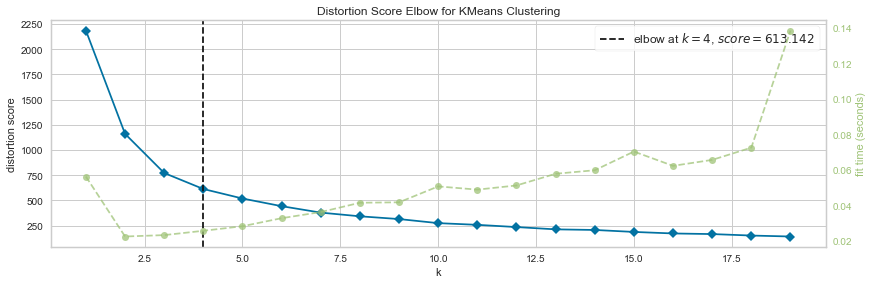

In [4]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20), metric='distortion', size=(1000, 300))

visualizer.fit(df_z.T)        
visualizer.show()

### Hierarchical

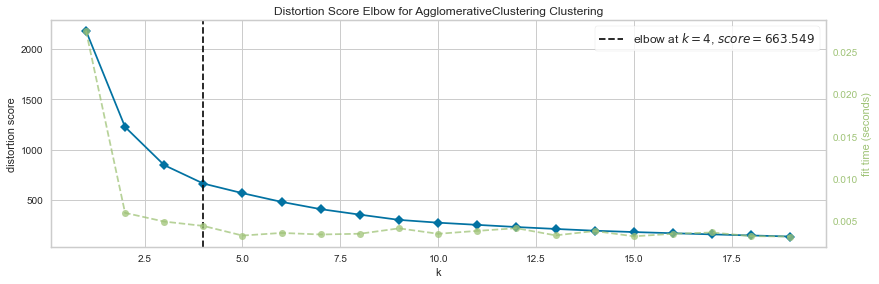

In [5]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1,20), metric='distortion', size=(1000, 300))

visualizer.fit(df_z.T)        
visualizer.show()